# Coffee Sales from Ukranian Coffee Machine

### 1. Define the Question 
This dataset was collected from a coffee vending machine in the Ukraine from March 2024 through November 2024. Is there any correlation between price and popularity in coffee drinks?

In [ ]:
# import the bare necessities
import pandas as pd
import matplotlib
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter




### 2. Read in the Data

Data Source: https://www.kaggle.com/datasets/ihelon/coffee-sales

In [ ]:
#read the file and create a copy (because I read making a copy of the original data is good practice)
coffee_sales = pd.read_csv('coffee-sales.csv')
coffee_copy = coffee_sales.copy()

#define how many rows and columns of data
shape = coffee_copy.shape
print(f"The number of rows is {shape[0]} and the number of columns is {shape[1]}.")
coffee_copy


The number of rows is 2341 and the number of columns is 6.


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
2336,2024-11-16,2024-11-16 12:49:35.127,card,ANON-0000-0000-0913,35.76,Latte
2337,2024-11-16,2024-11-16 13:16:55.479,card,ANON-0000-0000-0819,30.86,Americano with Milk
2338,2024-11-16,2024-11-16 13:18:00.476,card,ANON-0000-0000-0914,35.76,Latte
2339,2024-11-16,2024-11-16 13:19:09.028,card,ANON-0000-0000-0914,35.76,Latte


### 3. Data Cleaning

In [3]:
#find out if there is any missing data 
missing = coffee_copy.isnull().any().any()

if missing == True:
        print("True")
else:
        print("False")

True


In [4]:
#find where the missing data is located 
coffee_copy.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

The missing data is in the card data. I'm going to take a closer look at that column of data to see what's missing so I can decide how to fill it, or if I feel it's necessary to fill. 

In [ ]:
#print both cash_type and card columns because I think there's a correlation between the two. If a customer paid with cash, then the card data would be missing.
card_column = coffee_copy[['cash_type', 'card']]
card_column

,cash_type,card
0,card,ANON-0000-0000-0001
1,card,ANON-0000-0000-0002
2,card,ANON-0000-0000-0002
3,card,ANON-0000-0000-0003
4,card,ANON-0000-0000-0004
...,...,...
2336,card,ANON-0000-0000-0913
2337,card,ANON-0000-0000-0819
2338,card,ANON-0000-0000-0914
2339,card,ANON-0000-0000-0914


Hypothesis: All the rows missing data are card, and whoever bought coffee can choose to use card or cash to pay (see column, "cash_type"). If the card column is missing data, then I conclude the person used cash to pay. 

In [6]:
#print columns with null data and compare with cash_type column
null_data = card_column[card_column.isnull().any(axis=1)]
null_data

,cash_type,card
12,cash,NaN
18,cash,NaN
41,cash,NaN
46,cash,NaN
49,cash,NaN
...,...,...
657,cash,NaN
677,cash,NaN
685,cash,NaN
691,cash,NaN


I was correct. Those who paid with cash didn't use a card so the card data is null. For this project I'm not concerned with which method was used to pay, only how much the drink cost.

In order to fulfill the specifications of this project, I'm going to fill the nulls. Then I will remove both cash_type and card columns from the dataset. But first,  I'm going to clean up the column headers.

In [7]:
#function to clean column titles and fill null data with zeros
def clean_cc(coffee_copy) -> pd.DataFrame:

    coffee_copy.columns = coffee_copy.columns.str.title()
    coffee_copy.columns = coffee_copy.columns.str.strip().str.replace('_', ' ')

    coffee_copy = coffee_copy.fillna(0)

    return coffee_copy

coffee_copy = clean_cc(coffee_copy)
coffee_copy

,Date,Datetime,Cash Type,Card,Money,Coffee Name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
2336,2024-11-16,2024-11-16 12:49:35.127,card,ANON-0000-0000-0913,35.76,Latte
2337,2024-11-16,2024-11-16 13:16:55.479,card,ANON-0000-0000-0819,30.86,Americano with Milk
2338,2024-11-16,2024-11-16 13:18:00.476,card,ANON-0000-0000-0914,35.76,Latte
2339,2024-11-16,2024-11-16 13:19:09.028,card,ANON-0000-0000-0914,35.76,Latte


Now that I've filled the null values with zero, I'm going to drop the columns Datetime, Date, Cash Type, and Card. I want to keep the date of Money and Coffee Name for my analysis. 

In [8]:
# Calling our function to clean our data
coffee_copy_cleaned= clean_cc(coffee_copy)

# Dropping unnecessaary columns
coffee_copy_cleaned = coffee_copy_cleaned.drop(["Date", "Cash Type", "Card", "Datetime"], axis=1)

coffee_copy_cleaned


,Money,Coffee Name
0,38.70,Latte
1,38.70,Hot Chocolate
2,38.70,Hot Chocolate
3,28.90,Americano
4,38.70,Latte
...,...,...
2336,35.76,Latte
2337,30.86,Americano with Milk
2338,35.76,Latte
2339,35.76,Latte


In [ ]:
# Create new column showing value of Ukrainian Hyrvnia in USD
coffee_copy_cleaned['USD'] = coffee_copy_cleaned['Money'] * 0.024 
coffee_copy_cleaned

,Money,Coffee Name,USD
0,38.70,Latte,0.92880
1,38.70,Hot Chocolate,0.92880
2,38.70,Hot Chocolate,0.92880
3,28.90,Americano,0.69360
4,38.70,Latte,0.92880
...,...,...,...
2336,35.76,Latte,0.85824
2337,30.86,Americano with Milk,0.74064
2338,35.76,Latte,0.85824
2339,35.76,Latte,0.85824


In [24]:
#Count occurrences of each coffee type & Create a column showing the popularity of the different drinks 
coffee_count = coffee_copy_cleaned.groupby("Coffee Name").size().reset_index(name="Popularity")
coffee_copy_cleaned['Popularity'] = coffee_count.groupby("Coffee Name").size()

#rearranged in descending order
coffeeCount_sorted = coffee_count.sort_values(by="Popularity", ascending=False)

coffeeCount_sorted

,Coffee Name,Popularity
1,Americano with Milk,559
7,Latte,555
2,Cappuccino,332
0,Americano,301
4,Cortado,222
6,Hot Chocolate,175
3,Cocoa,108
5,Espresso,89


In [11]:
coffee_copy_dtypes = coffee_copy_cleaned.dtypes

coffee_copy_dtypes


Money          float64
Coffee Name     object
USD            float64
Popularity     float64
dtype: object

Now I am going to convert my columns to proper data types. Float64 is fine for Money and USD. However, I want to convert the Coffee Name column to string datatype. 

In [25]:
#convert Coffee Name 
coffee_copy_cleaned['Coffee Name'] = coffee_copy_cleaned['Coffee Name'].astype(str)
coffee_copy_cleaned.dtypes


Money          float64
Coffee Name     object
USD            float64
Popularity     float64
dtype: object

Coffee Name is still object. I'm going to check the data type more closely. 

In [30]:
print(coffee_copy_cleaned['Coffee Name'].dtype)
print(coffee_copy_cleaned['Coffee Name'].map(type).value_counts())

object
Coffee Name
<class 'str'>    2341
Name: count, dtype: int64


So, today I learned that object classes in pandas can also include strings. My data types are the proper data types! 

### 4. Exploratory Data Analysis

#### (AKA Let's get to the good part.)

In [ ]:

def summarize_sales(coffee_copy_cleaned: DataFrame) -> dict:
    """
    Parameters:
        coffee_copy_cleaned (pandas.DataFrame): The Coffee Sales dataset contains two columns with pricing. 
                                          
    Returns:
        float: A formatted float summarizing the total, mean (rounded to 2 decimal places),
             and median cost of coffees sold in Ukrainian Hyrvnia.
    """
    # Calculate total, mean, and median backers
    cc_sum = coffee_copy_cleaned['Money'].sum()
    cc_mean = coffee_copy_cleaned['Money'].mean().round(2)
    cc_median = coffee_copy_cleaned['Money'].median()
    cc_min = coffee_copy_cleaned['Money'].min()
    cc_max = coffee_copy_cleaned['Money'].max()

    # Return a formatted string
    return (f"The total number of sales is {cc_sum}.\n"
            f"The mean number of sales is {cc_mean}.\n"
            f"The median number of sales is {cc_median}.\n"
            f"The smallest sale was {cc_min}.\n"
            f"The largest sale was {cc_max}."
            )

coffee_copy_summary = summarize_sales(coffee_copy_cleaned)
print(coffee_copy_summary)

The total number of sales is 74482.98000000001.
The mean number of sales is 31.82.
The median number of sales is 32.82.
The smallest sale was 18.12.
The largest sale was 40.0.


I'm going to use a bar chart to show pricing for each coffee drink. 

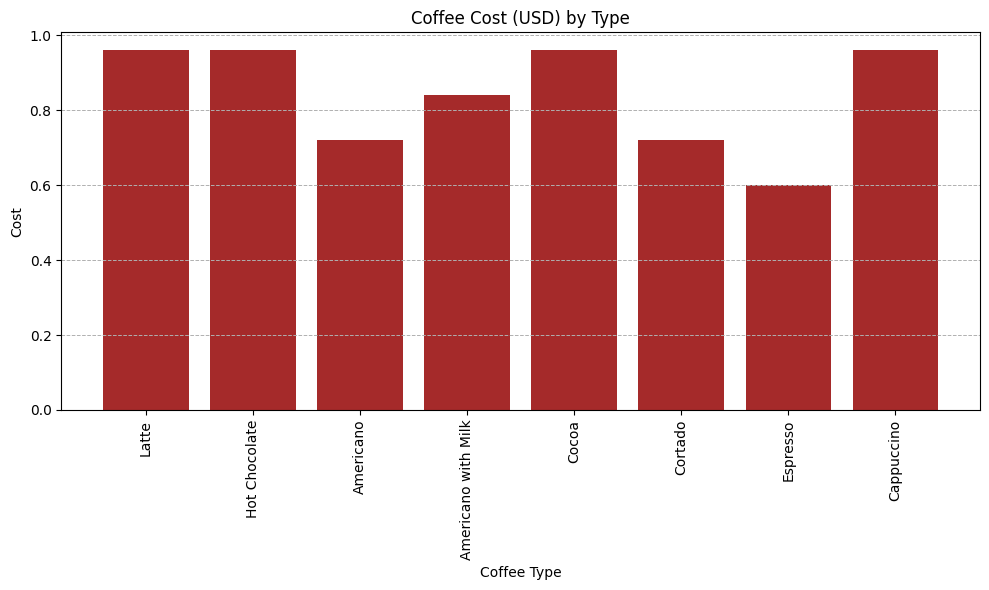

In [31]:
# Step 1: Define where the data is coming from
Cost = coffee_copy_cleaned['USD']
Coffee_Type = coffee_copy_cleaned['Coffee Name']

# Step 2: Create the Plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(Coffee_Type, Cost, color='brown')  # Create a bar plot

# Step 3: Rotate x-axis labels
plt.xticks(rotation=90)

# Step 4: Add Title and Labels
plt.title('Coffee Cost (USD) by Type')  # Title of the plot
plt.xlabel('Coffee Type')  # Label for x-axis
plt.ylabel('Cost')  # Label for y-axis

# Step 5: Optional - Add Gridlines
# Uncomment the following line if you want to add gridlines
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Step 6: Adjust Layout
plt.tight_layout()  # Adjust layout to avoid overlap

# Step 7: Show the Plot
plt.show()


Well. 

That tells me Cappuccino, Latte, Hot Chocolate, and Cocoa are the most expensive - but it doesn't tell me if it's the most popular based on price. I need to find out how many of each drink type have been purchased. 


In [16]:
# Count occurrences of each coffee type
coffee_count = coffee_copy_cleaned.groupby("Coffee Name").size().reset_index(name="Popularity")

coffee_count
#rearranged in descending order
coffeeCount_sorted = coffee_count.sort_values(by="Popularity", ascending=False)

coffeeCount_sorted

,Coffee Name,Popularity
1,Americano with Milk,559
7,Latte,555
2,Cappuccino,332
0,Americano,301
4,Cortado,222
6,Hot Chocolate,175
3,Cocoa,108
5,Espresso,89


In [17]:
#rearranged in descending order
coffeeCount_sorted = coffee_count.sort_values(by="Popularity", ascending=False)

coffeeCount_sorted

,Coffee Name,Popularity
1,Americano with Milk,559
7,Latte,555
2,Cappuccino,332
0,Americano,301
4,Cortado,222
6,Hot Chocolate,175
3,Cocoa,108
5,Espresso,89


In [18]:
#resetting the index column
coffeeCount_sorted = coffeeCount_sorted.reset_index(drop=True)
coffeeCount_sorted

,Coffee Name,Popularity
0,Americano with Milk,559
1,Latte,555
2,Cappuccino,332
3,Americano,301
4,Cortado,222
5,Hot Chocolate,175
6,Cocoa,108
7,Espresso,89


Now that I have coffee drink by popularity, I'll create another bar chart to visualize which drink is being ordered the most. 

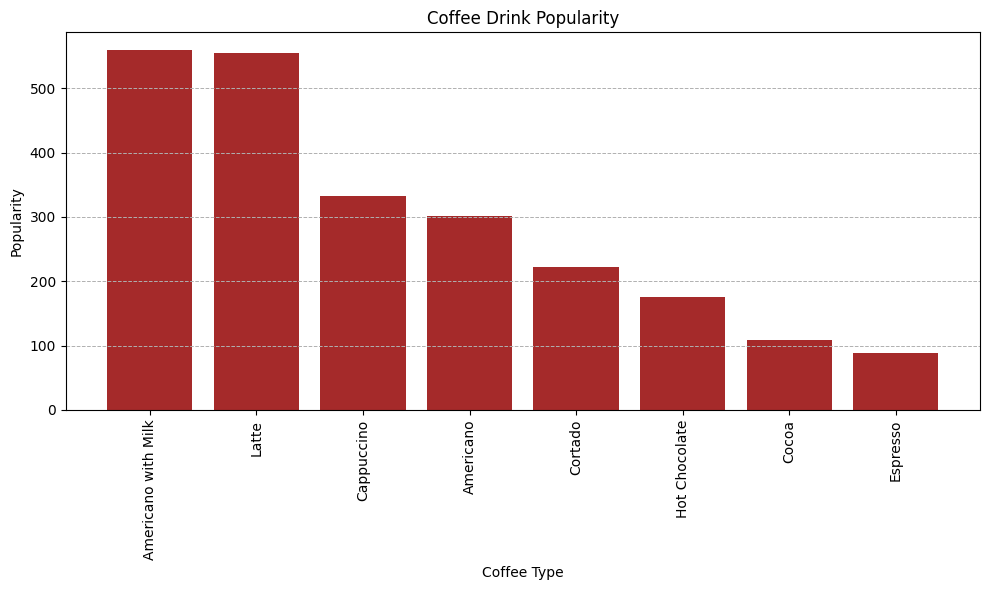

In [23]:
# Step 1: Define where the data is coming from
number_ordered = coffeeCount_sorted['Popularity']
Coffee_Type = coffeeCount_sorted['Coffee Name']

# Step 2: Create the Plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(Coffee_Type, number_ordered, color='brown')  # Create a scatter plot

# Step 3: Rotate x-axis labels
plt.xticks(rotation=90)

# Step 4: Add Title and Labels
plt.title('Coffee Drink Popularity')  # Title of the plot
plt.xlabel('Coffee Type')  # Label for x-axis
plt.ylabel('Popularity')  # Label for y-axis

# Step 5: Optional - Add Gridlines
# Uncomment the following line if you want to add gridlines
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Step 6: Adjust Layout
plt.tight_layout()  # Adjust layout to avoid overlap

# Step 7: Show the Plot
plt.show()


Now I want to pull the prices for each type (only one instance of each). And then I'll compare it to it's popularity to see if there's any correlation between price and popularity. 

In [36]:
unique_coffee_cost = (coffee_copy_cleaned.drop_duplicates(subset="Coffee Name", keep="first")[["Coffee Name", "USD"]]
    .sort_values(by="USD", ascending=False)
    .reset_index(drop=True)
)
unique_coffee_cost["USD"] = unique_coffee_cost["USD"].round(2)
unique_coffee_cost

,Coffee Name,USD
0,Latte,0.93
1,Hot Chocolate,0.93
2,Cappuccino,0.93
3,Cocoa,0.93
4,Americano with Milk,0.81
5,Americano,0.69
6,Cortado,0.69
7,Espresso,0.58


# 5. Analysis and Insights

Latte, Hot Chocolate, Cappuccino, and Cocoa represent the highest price tier ($0.93); followed by Americano with Milk ($0.81); Americano and Cortado ($0.69), and finally Espresso ($0.58). This pricing hierarchy is consistent with the quantities of ingredients typically required for each beverage. 

Looking above at the bar chart showing different drinks' popularity, we can see that Americano with Milk is the most popular, followed very closely by Latte. Cappuccino is a distant third with a significant drop off. 


# 6. Conclusion and Recommendations
It appears that users of this machine prefer milk in their coffee. Although Latte is priced higher than Americano with Milk, it remains the second most preferred choice among coffee beverages. Furthermore, one could infer that the quality of the coffee is perceived to be lower without milk, as Espresso, despite being the most economical option, is the least selected drink.

In order to find out if the coffee choice is based on price or quality, I recommend conitnuing to monitor the sales from the machine. 
